No handles with labels found to put in legend.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
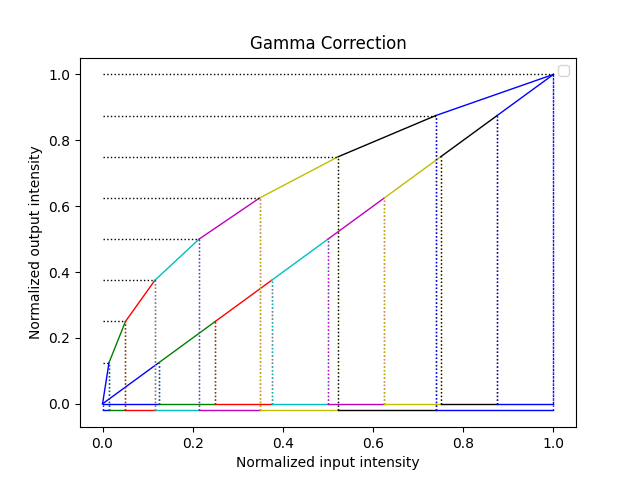

In [43]:
%matplotlib widget
import numpy as np

import matplotlib.pyplot as plt
y_8bit = np.linspace(0,1,9)
x = np.linspace(0,1,100)
x1 = np.linspace(0,0.04045,5)
x2 = np.linspace(0.04046, 1, 95)

colors = ['b','g', 'r', 'c', 'm', 'y', 'k', 'b']
def srgb2lrgb(x):
  if x<=0.04045:
    return x/12.92
  else:
    return ((x+0.055)/1.055)**2.4

def lrgb2srgb(x):
  if x <= 0.0031308:
    return x*12.92
  else:
    return 1.055*(x**(1/2.4))-0.055

lrgb2srgb_vec = np.vectorize(lrgb2srgb)
srgb2lrgb_vec = np.vectorize(srgb2lrgb)

x_lrgb = np.concatenate([x1, x2])
gamma = 2.2

decoded = x**gamma
encoded = x**(1/gamma)
linear1 = x1/12.92
linear2 = ((x2+0.055)/1.055)**2.4


y_lrgb = np.concatenate([linear1, linear2])
plt.title('Gamma Correction')
plt.xlabel('Normalized input intensity')
plt.ylabel('Normalized output intensity')
for i in range(8):
  y = y_8bit[i:i+2]
  x = srgb2lrgb_vec(y)

  plt.plot(y,y, colors[i], linewidth=1)
  plt.plot(x, y, colors[i],linewidth=1)
  plt.plot(x, [-0.02,-0.02], colors[i], linewidth=1)
  plt.plot(y, [0,0], colors[i], linewidth=1)
  plt.plot([x[0], x[0]], [-0.02, y[0]], colors[i]+':', linewidth=1)
  plt.plot([x[1], x[1]], [-0.02, y[1]], colors[i]+':', linewidth=1)
  plt.plot([y[0], y[0]], [0, y[0]], colors[i]+':', linewidth=1)
  plt.plot([y[1], y[1]], [0, y[1]], colors[i]+':', linewidth=1)
  plt.plot([0,x[0]], [y[0], y[0]], 'k:', linewidth=1)
  if i == 7:
    plt.plot([0,x[1]], [y[1], y[1]], 'k:', linewidth=1)
#plt.plot([], [0, 1/8])
plt.legend()
plt.show()


(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'CIE 1931 Chromaticity Diagram - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='CIE x', ylabel='CIE y'>)

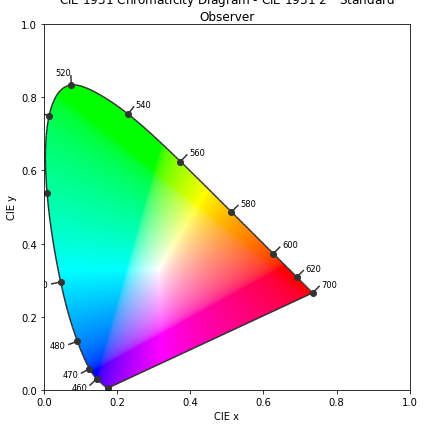

In [2]:
import colour
colour.plotting.plot_chromaticity_diagram_CIE1931(standalone=False)
#plt.scatter(xy[:100,0], xy[:100,1])
#colour.plotting.render(
#    standalone=True,
#    limits=(-0.1, 0.9, -0.1, 0.9),
#    x_tighten=True,
#    y_tighten=True)

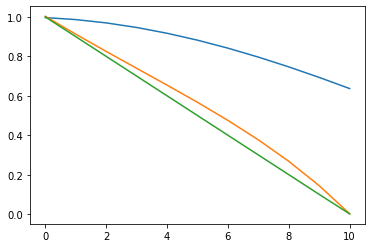

0.9003163161571061


In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
# The correction factor can be written out as follows:
# min(x*pi/(N*sin(pi*x/N),10)
# x: index of element of original mtf; N: length of original mtf
# in the function k is used as the normalized x, which equals x/N.


def mtf_correction_factor(k):
    #return min(math.pi*k/(math.sin(math.pi*k)), 10)
    return max(math.sin(math.pi*k/2)/(math.pi*k/2),0.1)

# A correction factor for the numeric MTF, mainly because the Fourier transformation on discrete signal has different
# performance than the transformation on continuous signal.
def get_mtf_correct_curve(mtf):
    N = len(mtf)
    x = np.linspace(1, N, N)
    correct_curve = np.array([mtf_correction_factor(xi/N) for xi in x])
    return correct_curve


mtf = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.001]
N = len(mtf)
correct_curve = get_mtf_correct_curve(mtf)
corrected_mtf = mtf/correct_curve

#correct_curve = np.array([mtf_correction_factor(xi/N) for xi in x])

plt.plot(correct_curve)
plt.plot(corrected_mtf)
plt.plot(mtf)
plt.show()
print(mtf_correction_factor(0.5))

    